In [1]:
from PythonCode.preprocess import *

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eviat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\eviat\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
from PythonCode.models import *

In [3]:
import pandas as pd
import swifter
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
from typing import List
from nltk.corpus import stopwords
from itertools import islice
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import os
import sys
from abc import ABC, abstractmethod

In [4]:
# def load_data(path: str) -> pd.DataFrame:
#     rows_list = []
#     _, authors, _ = next(os.walk(path))
#     for author_name in islice(authors, 2):
#             curr_row = {"author_name": author_name}
#             author_path = os.path.join(path, author_name)
#             _, _, books_files = next(os.walk(author_path))
#             for book_name in books_files:
#                 curr_row["book_name"] = book_name
#                 with open(os.path.join(author_path, book_name), "r") as book:
#                     curr_row["book_text"] = book.read()
#                 rows_list.append(curr_row.copy())
#     return pd.DataFrame(rows_list)

In [5]:
# data  = load_data("Data/C50train/")

In [6]:
# data.shape

In [7]:
preprocess_pipeline("Data/C50train", ["bag of words"], 0.3,("x_train_2_norm.csv","x_test_2_norm.csv", "y_train_2.csv", "y_test_2.csv"))

C:\Users\eviat\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:538: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


(      $    &    '    ''   'm  're   's  've    (    )  ...  without  won  \
 0   1.0  0.0  0.0   8.0  0.0  1.0  0.0  0.0  1.0  1.0  ...      0.0  0.0   
 1   1.0  0.0  0.0   1.0  0.0  0.0  5.0  0.0  0.0  0.0  ...      0.0  0.0   
 2   0.0  1.0  0.0  11.0  0.0  0.0  7.0  1.0  0.0  0.0  ...      1.0  0.0   
 3   0.0  1.0  0.0  11.0  0.0  0.0  7.0  1.0  0.0  0.0  ...      1.0  0.0   
 4   1.0  0.0  1.0   1.0  0.0  0.0  1.0  0.0  3.0  3.0  ...      0.0  0.0   
 ..  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...  ...      ...  ...   
 95  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...      NaN  NaN   
 96  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...      NaN  NaN   
 97  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...      NaN  NaN   
 98  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...      NaN  NaN   
 99  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...      NaN  NaN   
 
     wood  work  world  would  year  year-end  yet  you  
 0    0.0   0.0 

In [17]:
x_train = pd.read_csv("x_train_2.csv", index_col=0)
y_train = pd.read_csv("y_train_2.csv",index_col=0)
x_test = pd.read_csv("x_test_2.csv", index_col=0)
y_test = pd.read_csv("y_test_2.csv", index_col=0)

In [18]:
x_train.shape

(93, 3657)

In [19]:
x_train = x_train.dropna()

In [20]:
x_train.shape

(70, 3657)

In [21]:
x_test = x_test.dropna()

In [22]:
y_test.shape

(30, 1)

              precision    recall  f1-score   support

           0       0.35      0.43      0.39        14
           1       0.38      0.31      0.34        16

    accuracy                           0.37        30
   macro avg       0.37      0.37      0.37        30
weighted avg       0.37      0.37      0.36        30



C:\Users\eviat\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


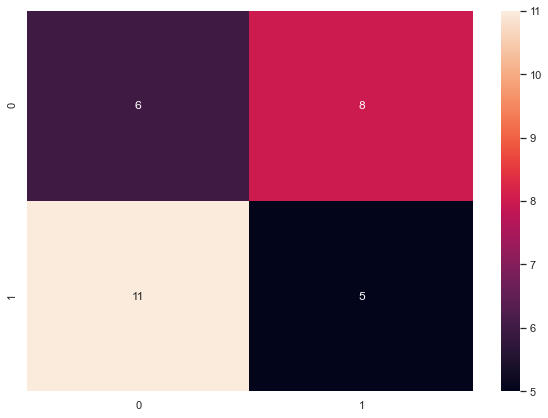

In [23]:
from sklearn.naive_bayes import MultinomialNB
class Naive_Bayes(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = MultinomialNB(**kwargs)
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
Naive_Bayes().pipeline(x_train.values, y_train.values, x_test.values, y_test.values,"Multinomial Naive Bayes 2 Authors",do_cross_validation=False)

              precision    recall  f1-score   support

           0       0.31      0.29      0.30        14
           1       0.41      0.44      0.42        16

    accuracy                           0.37        30
   macro avg       0.36      0.36      0.36        30
weighted avg       0.36      0.37      0.36        30



C:\Users\eviat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


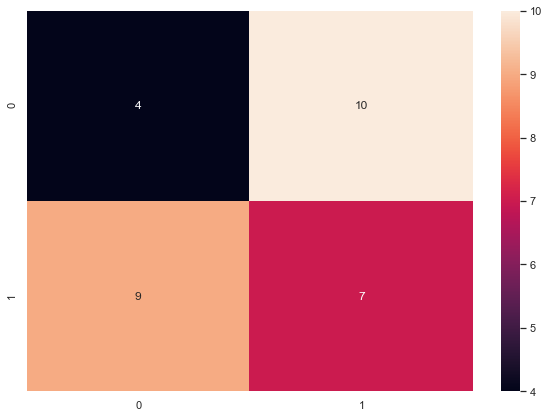

In [15]:
from sklearn.neighbors import KNeighborsClassifier
class KNN(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = KNeighborsClassifier(n_neighbors=7, weights= 'distance', p=2)
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
KNN().pipeline(x_train.values, y_train.values, x_test.values, y_test.values,"KNN 2 Authors 1.3",do_cross_validation=False)

C:\Users\eviat\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.31      0.29      0.30        14
           1       0.41      0.44      0.42        16

    accuracy                           0.37        30
   macro avg       0.36      0.36      0.36        30
weighted avg       0.36      0.37      0.36        30



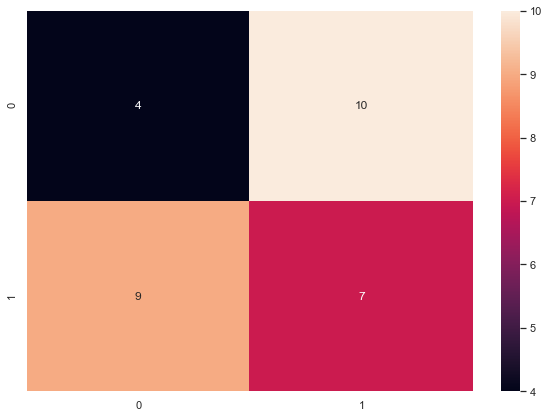

In [16]:
from sklearn.linear_model import SGDClassifier
class LogisticRegression(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = SGDClassifier(loss='log')
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
KNN().pipeline(x_train.values, y_train.values, x_test.values, y_test.values,"LogisticRegression 2 Authors 1.1",do_cross_validation=False)